In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X,y=load_from_arff("E:/IDMdownload/flags_2/flags.arff",label_count=7,label_location='end')
X,y=X.toarray(),y.toarray()

In [4]:
bls = bls3.broadnet(maptimes = 30,
               enhencetimes = 40,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=20
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95935 minvalue 0.06468 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94402 minvalue 0.02859 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9574 minvalue 0.07779 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96361 minvalue 0.05071 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94122 minvalue 0.08485 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93858 minvalue 0.03715 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalu

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97223 minvalue 0.04518 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9397 minvalue 0.05076 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96212 minvalue 0.07766 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94865 minvalue 0.03818 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95786 minvalue 0.05672 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96604 minvalue 0.05054 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalu

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95257 minvalue 0.05591 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94328 minvalue 0.05934 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95112 minvalue 0.06058 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9506 minvalue 0.04518 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 1e-05 
enhence nodes maxvalue 0.93555 minvalue 0.05281 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96767 minvalue 0.04471 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxva

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95749 minvalue 0.05974 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 1e-05 
enhence nodes maxvalue 0.9635 minvalue 0.03754 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95687 minvalue 0.05191 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 0.99999 minvalue 0.0 
enhence nodes maxvalue 0.9606 minvalue 0.05512 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.92831 minvalue 0.03375 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94803 minvalue 0.02927 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes ma

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9511 minvalue 0.04691 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94437 minvalue 0.04698 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95291 minvalue 0.05998 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94653 minvalue 0.06026 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94374 minvalue 0.03204 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94773 minvalue 0.0536 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95796 minvalue 0.06279 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96004 minvalue 0.05077 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94531 minvalue 0.04422 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 0.99999 minvalue 0.0 
enhence nodes maxvalue 0.95822 minvalue 0.06065 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.92297 minvalue 0.05012 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95728 minvalue 0.03978 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes ma

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95251 minvalue 0.06561 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93633 minvalue 0.03802 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94654 minvalue 0.05308 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96149 minvalue 0.04868 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95792 minvalue 0.05078 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95162 minvalue 0.04112 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxval

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94317 minvalue 0.04666 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95785 minvalue 0.06522 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 0.99999 minvalue 0.0 
enhence nodes maxvalue 0.95962 minvalue 0.04611 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94368 minvalue 0.03999 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95454 minvalue 0.0413 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9547 minvalue 0.04955 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxv

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95643 minvalue 0.03887 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95103 minvalue 0.04722 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95572 minvalue 0.04597 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 0.99999 minvalue 0.0 
enhence nodes maxvalue 0.95998 minvalue 0.04775 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95781 minvalue 0.06648 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94253 minvalue 0.04854 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes ma

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9438 minvalue 0.03834 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93465 minvalue 0.05473 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94893 minvalue 0.04473 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94789 minvalue 0.05808 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95308 minvalue 0.03318 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94766 minvalue 0.046 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9527 minvalue 0.03014 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95425 minvalue 0.04413 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95717 minvalue 0.05599 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95684 minvalue 0.05086 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97396 minvalue 0.06632 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96918 minvalue 0.0549 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95131 minvalue 0.06497 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94459 minvalue 0.05174 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94796 minvalue 0.05756 


D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96096 minvalue 0.04191 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96317 minvalue 0.05352 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94254 minvalue 0.0721 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95002 minvalue 0.058 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9641 minvalue 0.05193 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96656 minvalue 0.04451 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95119 minvalue 0.05471 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96332 minvalue 0.02523 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93038 minvalue 0.04046 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93717 minvalue 0.05743 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9496 minvalue 0.04764 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96693 minvalue 0.05204 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalu

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95683 minvalue 0.04672 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94514 minvalue 0.07199 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95523 minvalue 0.0322 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93679 minvalue 0.03266 


E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95653 minvalue 0.04428 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95878 minvalue 0.06168 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96554 minvalue 0.05281 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.92975 minvalue 0.03672 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93885 minvalue 0.03884 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96112 minvalue 0.05729 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxval

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95974 minvalue 0.04857 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9679 minvalue 0.04255 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9651 minvalue 0.08224 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94839 minvalue 0.04403 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94611 minvalue 0.04673 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.93371 minvalue 0.06629 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97101 minvalue 0.0319 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.92753 minvalue 0.03316 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95075 minvalue 0.0416 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9495 minvalue 0.03908 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95177 minvalue 0.04171 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96824 minvalue 0.05409 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96387 minvalue 0.0461 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96191 minvalue 0.04695 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9493 minvalue 0.04376 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95069 minvalue 0.04433 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96307 minvalue 0.05279 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94403 minvalue 0.02399 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94648 minvalue 0.05107 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9596 minvalue 0.08493 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94245 minvalue 0.04028 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95176 minvalue 0.04093 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94156 minvalue 0.03713 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94272 minvalue 0.03175 
number of mapping nodes 570, number of enhence nodes 760
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalu

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


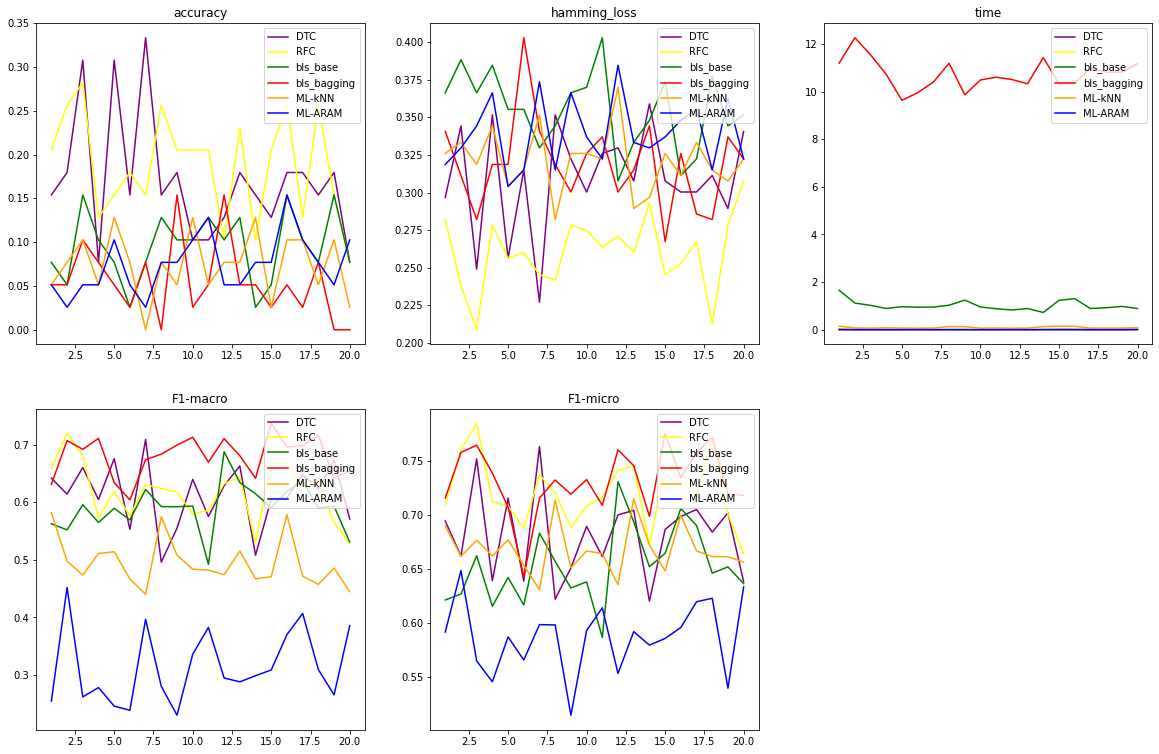

In [10]:
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.17051282051282052
the hamming loss of model1 0.3093406593406593
the time of model1 0.0012847250000016686
the F1 macro score of model1 0.6127639889539362
the F1 micro score of model1 0.6813486385978742


the accuracy score of model2 0.1871794871794872
the hamming loss of model2 0.26080586080586077
the time of model2 0.01891133500000216
the F1 macro score of model2 0.6182852422311778
the F1 micro score of model2 0.721350848469265


the accuracy score of model3 0.09487179487179488
the hamming loss of model3 0.3549450549450549
the time of model3 1.018059939999998
the F1 macro score of model3 0.5912708052699495
the F1 micro score of model3 0.6526089283178453


the accuracy score of model4 0.05512820512820512
the hamming loss of model4 0.3188644688644688
the time of model4 10.728844675000001
the F1 macro score of model4 0.679861403222598
the F1 micro score of model4 0.7308132239810419


the accuracy score of model5 0.07435897435897437
the hamming loss of model5

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


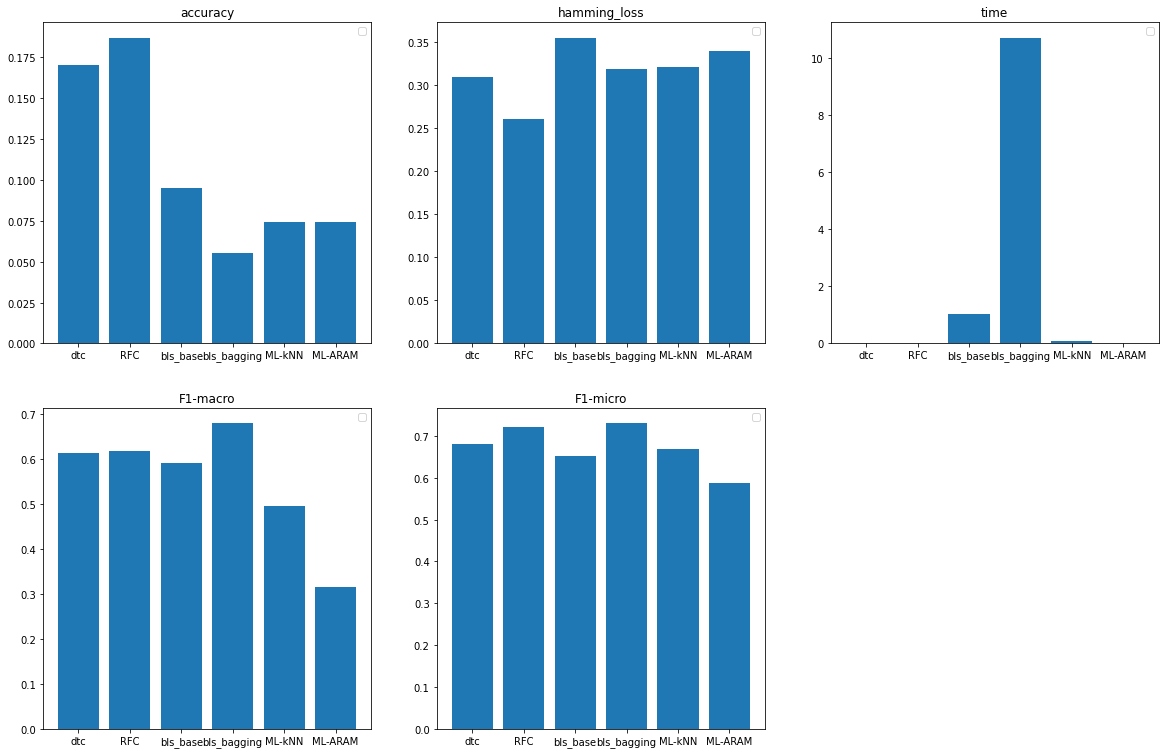

In [12]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0])
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1])
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2])
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3])
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4])
plt.legend(loc='upper right')
plt.show()